## Customer Churn Prediction using ANN

### Data Deatils
    Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

##### Data Dictionary
    CreditScore      : A score based on Banking System
    Geography        : Country
    Age              : Age of the Customer
    Tenure           : Time Period in Years
    No of Products   : An Integer Value
    HasCrCard        : Boolean either customer has credit card or not
    IsActiveMember   : Bollean either the customer is still a member of the bank or not
    Estimated Salary : Salary of the Customer
    Exited           : 1 - Churn , 0 - Not Churn
    
### Context:
    The whole analysis will be carried out in 3 parts
    
#### 1. Data Load and Clean
    Load the data , clean and  get basic insight and check clas balance

#### 2. Exploratory Data Analysis
    Carry out EDA to find the relaiton of output to different input, distribution of features and correlation matrix
    
#### 3. Model Development and Analysis
    Develop the Deep Learning Model and Analyze
    As the data is not balanced we will first try with raw data and check the accuracy matrics then will apply Re Sampling tecniques to balance data and retrain the model and analyse the accuracy
    
#### 4. Discussion and Recommendation
    Discuss the merits and demerits of the model in light of the accuracy score and recommend for optimization of the model

### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import tensorflow as tf
from tensorflow import keras
%matplotlib inline

### Data Load and Clean

In [2]:
# Load data from csv file
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4995,4996,15583480,Morgan,807,France,Female,36,4,0.00,2,0,1,147007.33,0
2377,2378,15637650,Williams,549,France,Male,50,9,94748.76,2,0,1,13608.18,0
367,368,15594720,Scott,460,Germany,Female,35,8,102742.91,2,1,1,189339.60,0
7468,7469,15627328,Millar,542,Spain,Female,26,2,0.00,2,1,1,54869.54,0
1979,1980,15635597,Echezonachukwu,644,France,Male,33,8,0.00,2,1,1,155294.17,0


In [3]:
# Check Columns 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##### Remove Unnecessary Columns
    CustomerID, RowNumber, Surname indicated individual records or customers hence will removed those features
    IsActiveMember and Exited represents the same feature so will not requied for that analysis

In [4]:
# Drop Unnecessary Columns
df.drop(['CustomerId','RowNumber','Surname','IsActiveMember'],axis='columns',inplace=True)

In [5]:
# Check the data type of the features
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Check for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
EstimatedSalary    0
Exited             0
dtype: int64

##### Observations:
    Data Types of the Features are align with analysis
    There is no null values 
    So we can go for further analysis

##### Check the balance of the Class (Exited)

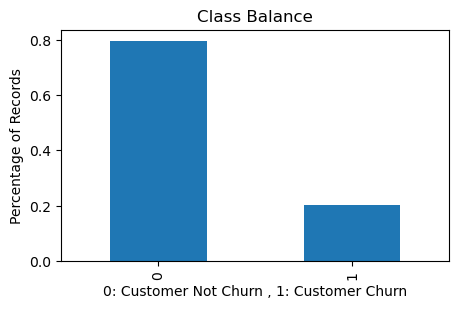

In [7]:
df['Exited'].value_counts(normalize=True).plot(kind='bar', figsize=(5,3));
plt.xlabel('0: Customer Not Churn , 1: Customer Churn')
plt.ylabel("Percentage of Records");
plt.title("Class Balance");

##### Observation:
    Here the ratio of different class is 80:20, so this is an unbalance dataset

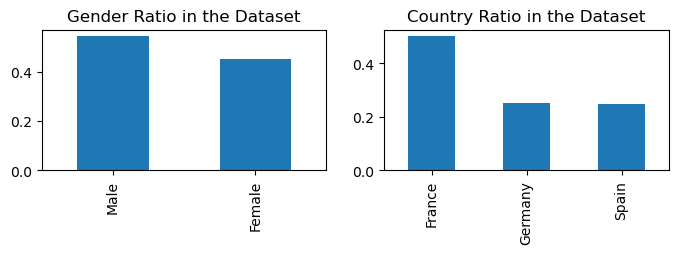

In [8]:
# Ratio of Different Feature Category
fig, ax = plt.subplots(1,2)
fig.set_size_inches(7, 2)
plt.tight_layout()
df['Gender'].value_counts(normalize=True).plot(kind='bar', ax=ax[0]);
df['Geography'].value_counts(normalize=True).plot(kind='bar', ax=ax[1]);
ax[0].set_title("Gender Ratio in the Dataset");
ax[1].set_title("Country Ratio in the Dataset");

### Observations:
    There is no dominating category in Gender and Country Feature

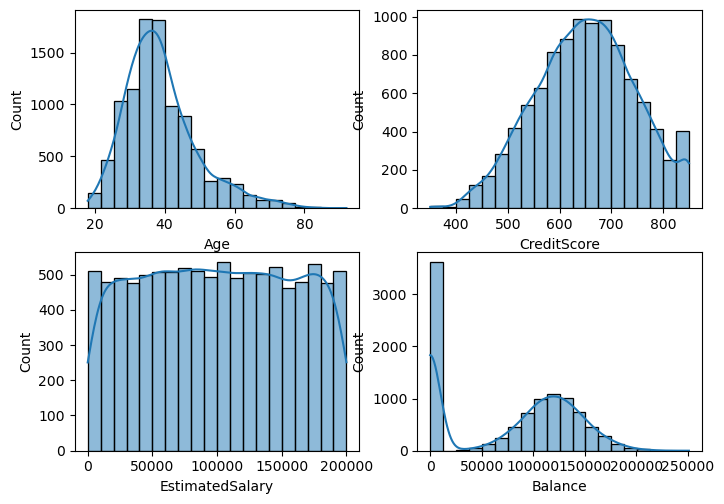

In [9]:
# Distribution of Age , Credit, Balance and Estimated Salary
fig, ax = plt.subplots(2,2)
fig.set_size_inches(7, 5)
plt.tight_layout()
sns.histplot(data=df, x='Age', kde=True, bins=20, ax=ax[0][0], alpha=0.5);
sns.histplot(data=df, x='CreditScore', kde=True, bins=20, ax=ax[0][1], alpha=0.5);
sns.histplot(data=df, x='EstimatedSalary', kde=True, bins=20, ax=ax[1][0], alpha=0.5);
sns.histplot(data=df, x='Balance', kde=True, bins=20, ax=ax[1][1], alpha=0.5);

### Observations:
    Age follows normal distribution. 
    THere are lot of customer with 0 Balance, rest of the customer balance follows a normal distribution
    Credit Score also follows a normal distribution with right skew
    Estimated Salary follows almost a uniform distribution

### Data Analysis and Insights

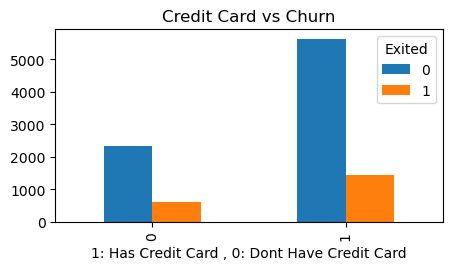

In [10]:
pd.crosstab(df.HasCrCard,df.Exited).plot(kind="bar",figsize=(5,2.5))
plt.xlabel('1: Has Credit Card , 0: Dont Have Credit Card')
plt.title('Credit Card vs Churn');

##### Observations:
    Having credit card or not does not seems have any impact on customer churn

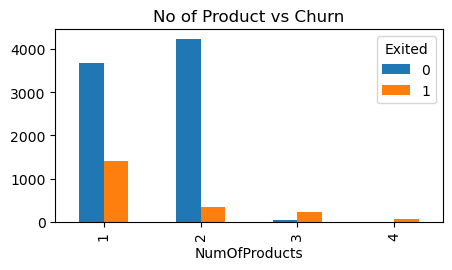

In [11]:
pd.crosstab(df.NumOfProducts,df.Exited).plot(kind="bar",figsize=(5,2.5))
plt.title('No of Product vs Churn');

##### Observations:
    No of Products seems does not have any impact on customer churn

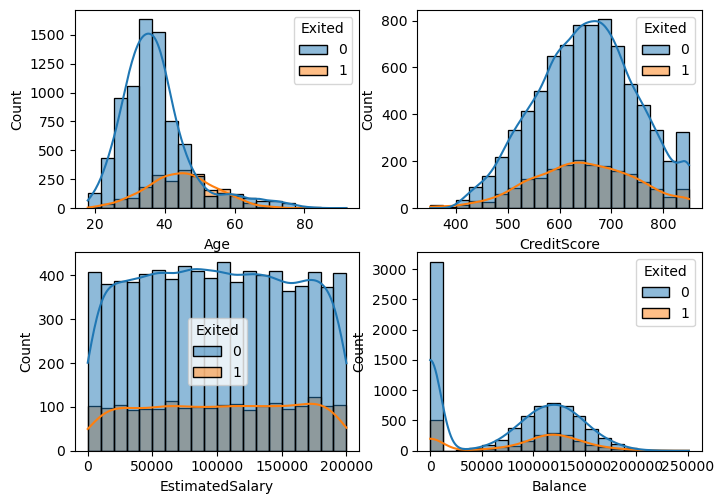

In [12]:
# Distribution of Age , Credit Score, and Estimated Salary
fig, ax = plt.subplots(2,2)
fig.set_size_inches(7, 5)
plt.tight_layout()
sns.histplot(data=df, x='Age', kde=True, hue="Exited", bins=20, ax=ax[0][0], alpha=0.5);
sns.histplot(data=df, x='CreditScore', kde=True, hue="Exited", bins=20, ax=ax[0][1], alpha=0.5);
sns.histplot(data=df, x='EstimatedSalary', hue="Exited", kde=True, bins=20, ax=ax[1][0], alpha=0.5);
sns.histplot(data=df, x='Balance', hue="Exited", kde=True, bins=20, ax=ax[1][1], alpha=0.5);

##### Observation:
    The distribution is similar for churn and not churn across different input features

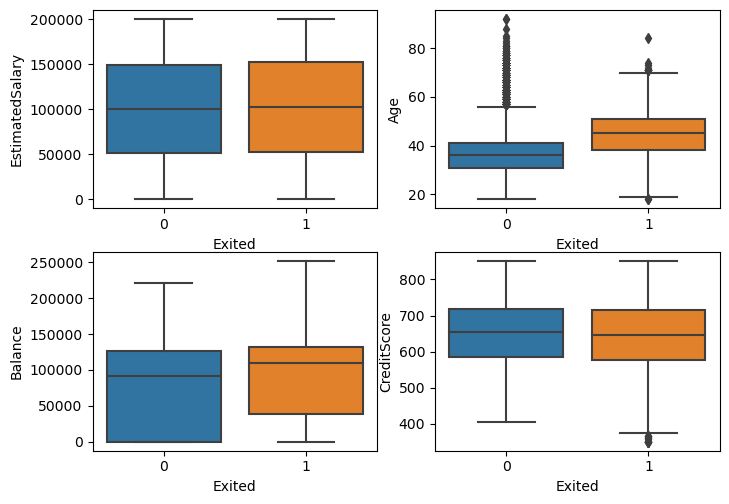

In [13]:
# Box - plot  of Age , Credit Score and Estimated Salary
fig, ax = plt.subplots(2,2)
fig.set_size_inches(7, 5)
plt.tight_layout()
sns.boxplot(data=df, y='EstimatedSalary', x="Exited", ax=ax[0][0]);
sns.boxplot(data=df, y='Balance', x="Exited", ax=ax[1][0]);
sns.boxplot(data=df, y='Age', x="Exited", ax=ax[0][1]);
sns.boxplot(data=df, y='CreditScore', x="Exited", ax=ax[1][1]);

##### Observations:
    Older people has more tendency to churn
    People with more balance has higher tendency to churn as well

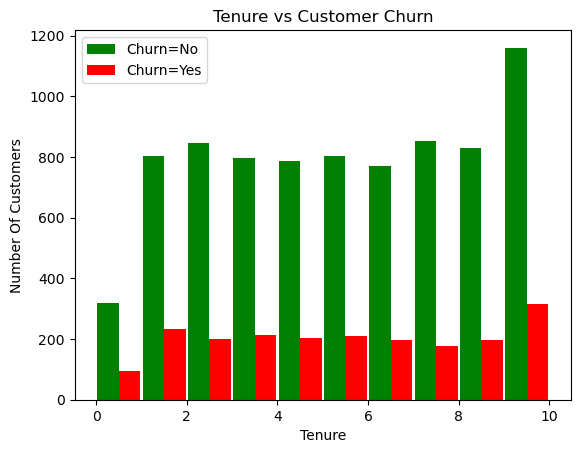

In [14]:
# Tenure vs Customer Churn

tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_no, tenure_churn_yes], rwidth=0.95, color=['green','red'],label=['Churn=No', 'Churn=Yes'])
plt.legend();
plt.title("Tenure vs Customer Churn");

##### Observations:
    Tenure seems does not have any imact on customer churn

In [15]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

### Model Development
    Steps: Feature Encoding, Train Test Split and Evalution of Accuracy Metric

**One hot encoding for categorical columns**

In [16]:
df2 = pd.get_dummies(data=df, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [17]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [18]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

**Train test split**

In [19]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

##### ANN Model

In [20]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(11,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.025)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.7301
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.7960
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7960
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7990
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7944
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.7974
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4425 - accuracy: 0.7968
Epoch 8/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7995
Epoch 9/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7989
Epoch 10/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8024

In [21]:
model.evaluate(X_test, y_test)
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 2ms/step


In [22]:
# Accuracy Scores
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.22      0.32       405

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.61      2000
weighted avg       0.78      0.81      0.77      2000



Text(33.22222222222222, 0.5, 'Truth')

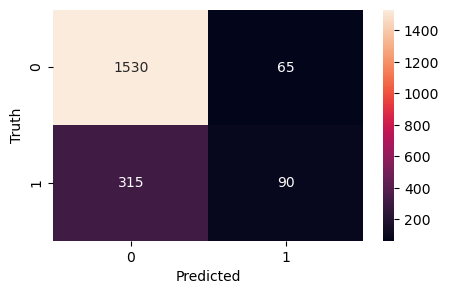

In [23]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Observations:
    The model has a tendency to predict 0, may be due to imbalance data

##### Logistic Regression
    As we found the model is biased we will train the model with Logistic Regression.

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7905


In [25]:
# Accuracy Score
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1595
           1       0.42      0.09      0.15       405

    accuracy                           0.79      2000
   macro avg       0.62      0.53      0.52      2000
weighted avg       0.73      0.79      0.73      2000



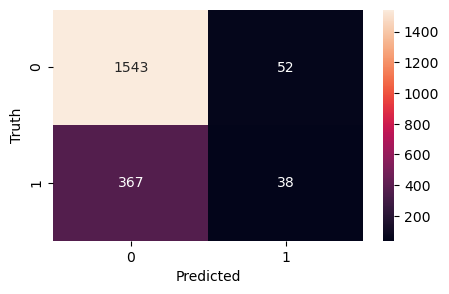

In [26]:
# Confusion Matrix
lr = tf.math.confusion_matrix(labels=y_test,predictions=lr_pred)
plt.figure(figsize = (5,3))
sns.heatmap(lr, annot=True, fmt='d')
plt.xlabel('Predicted');
plt.ylabel('Truth');

##### Observations:
    Similar to ANN, Logitic Regression also found the model is bias which is clearly visible from Confusion Matrix 
    and Recall Score
    
#### Drawback of this analysis:

    The output is imbalance with create a huge bias in the system and unable to predict the minor class

### ------------------------------------------------------- ###

### RESAMPLING
    As bothe Logistic Regression and ANN Model Turns to be bias due to imbalance dataset 
    we will resample the data to balance
    
##### Treat the Imbalance Data
    Method: Synthetic Minority Oversampling Technique (SMOT)

##### Reason of Using SMOT: 
    New synthatic examples of the minor class is are relateively close to feature place of existing minor class 

##### Drawback of SMOT: 
    SMOTE does not consider the major class which may result in class conflict if there is strong overlap between classes

    (Ref: https://arxiv.org/abs/1106.1813)

In [27]:
from imblearn.over_sampling import SMOTE
overSample=SMOTE()
X1, Y1= overSample.fit_resample(X, y)
Y1.value_counts()
X_train, X_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.2,random_state=5)

###### Train the Model again with Sampling Dataset

In [28]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.025)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
399/399 [==============================] - 3s 3ms/step - loss: 0.6620 - accuracy: 0.6046
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.6297 - accuracy: 0.6452
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.6019 - accuracy: 0.6839
Epoch 4/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5879 - accuracy: 0.7020
Epoch 5/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5802 - accuracy: 0.7093
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5739 - accuracy: 0.7114
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5702 - accuracy: 0.7159
Epoch 8/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5680 - accuracy: 0.7189
Epoch 9/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5654 - accuracy: 0.7190
Epoch 10/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5635 - accuracy: 0.7175

In [29]:
##### Model Evaluation
model.evaluate(X_test, y_test)
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

100/100 [==============================] - 0s 2ms/step


In [30]:
##### Classification Report
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1591
           1       0.77      0.78      0.78      1595

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



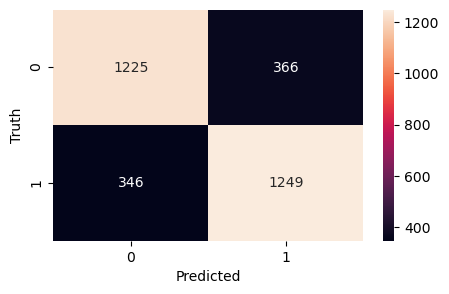

In [31]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted');
plt.ylabel('Truth');

##### Observation:
    Using Resampling we now have a good accuray score clearly visible here

##### ---------------------------------------------------
### Discussison 

    Using the original dataset we had a very low precesion and recall score with respect to 1. Which is very unexpected as the business is mainly focused on the customer that churn (1). So to get ride of this problem we used the sampling technique to balance the dataset and finally we get a good precision and recall score for customer churn
    
##### Drawback of the Analysis
    However oversampling the minor class may lead to overfitting 
    

